In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## load data

In [2]:
# import data
subset = np.load("../data/simimgs.npy")
subset = subset[:, :, :, 0, :, : , :, :, :]

y = np.zeros(subset.shape[:-2], dtype=int)
for i in range(5):
    y[i] = i
x = subset.reshape(-1, subset.shape[-4], subset.shape[-3], subset.shape[-2], subset.shape[-1])
y = y.reshape(-1, subset.shape[-4], subset.shape[-3])

# shuffle

np.random.seed(0)
index = np.arange(np.cumprod(subset.shape)[3])
np.random.shuffle(index)

x = x[index]
y = y[index]

x = x.reshape(-1, 64, 64)
y = y.reshape(-1)

xprime = np.zeros_like(x)

for i in range(x.shape[0]):
    xnew = x[i]  + 0.1*np.std(x[i])* np.random.random( (64, 64) )
    xnew = (np.log10(xnew) - np.log10(xnew.max()) + 2.) / 2.
    xprime[i] = xnew 
    
xprime[xprime < 0] = 0

x = xprime

# 0.6: 0.2: 0.2
x_train = x[:int(x.shape[0]*0.6)]
y_train = y[:int(x.shape[0]*0.6)]

x_val = x[int(x.shape[0]*0.6):int(x.shape[0]*0.8)]
y_val = y[int(x.shape[0]*0.6):int(x.shape[0]*0.8)]

x_test  = x[int(x.shape[0]*0.8):]
y_test  = y[int(x.shape[0]*0.8):]

index = np.arange(y_train.shape[0])
np.random.seed(0)
np.random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]


index = np.arange(y_val.shape[0])
np.random.seed(0)
np.random.shuffle(index)
x_val = x_val[index]
y_val = y_val[index]

index = np.arange(y_test.shape[0])
np.random.seed(0)
np.random.shuffle(index)
x_test = x_test[index]
y_test = y_test[index]

## plot VGG confusion matrix

In [3]:
model = tf.keras.models.load_model("../models/VGG_like/model")
# calculate accuracy for the VGG-like network
# loss, accuracy_test = model.evaluate(x_test[:,:,:, None],  y_test, verbose=2)

In [4]:
y_predict = model.predict_classes(x_test[:,:,:,None])

([<matplotlib.axis.YTick at 0x7fd89075f490>,
 [Text(0, 0, '11$M_{\\oplus}$'),
  Text(0, 1, '33$M_{\\oplus}$'),
  Text(0, 2, '0.3$M_J$'),
  Text(0, 3, '1$M_J$'),
  Text(0, 4, '3$M_J$')])

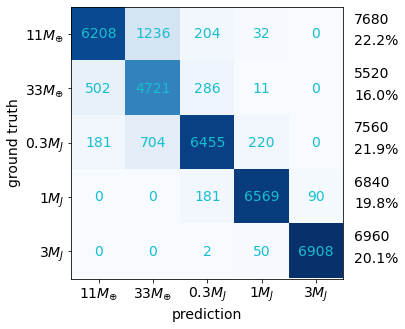

In [5]:
confusion_mat = np.zeros((5,5), dtype='int')
for i in range(5):
    for j in range(5):
        confusion_mat[i][j] = np.sum((y_test == i) & (y_predict == j))
        
plt.rc("font", size=14)
plt.figure(figsize=(7.5,5))
plt.imshow(confusion_mat, cmap='Blues')
for i in range(5):
    for j in range(5):
        plt.text(j, i, str(confusion_mat[i][j]), color = 'C9',
                 horizontalalignment='center', verticalalignment='center')
for i in range(5):
    plt.text(4.7, i-0.2, str(np.sum(confusion_mat, axis=1)[i])  )
    plt.text(4.7, i+0.2, f"{np.sum(confusion_mat, axis=1)[i]/len(y_predict)*100:1.1f}%"  )
    
plt.xlabel("prediction")
plt.ylabel("ground truth")
plt.xticks(np.arange(5), [r"11$M_{\oplus}$", r"33$M_{\oplus}$", r"0.3$M_J$", r"1$M_J$",  r"3$M_J$"])
plt.yticks(np.arange(5), [r"11$M_{\oplus}$", r"33$M_{\oplus}$", r"0.3$M_J$", r"1$M_J$",  r"3$M_J$"])
#plt.savefig('confusion_matrix_model_nov1_datagen.pdf', bbox_inches='tight', transparent=True)

## plot ResNet confusion matrix

In [6]:
model = tf.keras.models.load_model("../models/resnet/model/")
# calculate accuracy for the ResNet network
# loss, accuracy_test = model.evaluate(x_test[:,:,:, None],  tf.one_hot(y_test, depth=5), verbose=2)
prediction_score = model.predict(x_test[:,:,:,None])
prediction_class = np.argmax(prediction_score, axis=1)

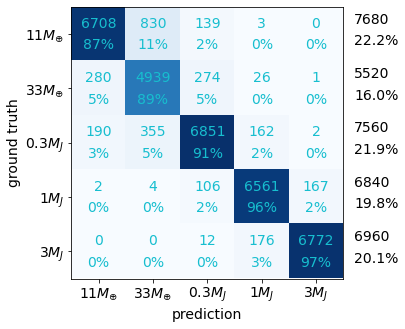

In [7]:
y_predict = prediction_class
#y_test = np.argmax(y_test, axis=1)
confusion_mat = np.zeros((5,5), dtype='int')
for i in range(5):
    for j in range(5):
        confusion_mat[i][j] = np.sum((y_test == i) & (y_predict == j))
        
plt.rc("font", size=14)
plt.figure(figsize=(7.5,5))
plt.imshow(confusion_mat, cmap='Blues')
for i in range(5):
    for j in range(5):
        plt.text(j, i-0.2, str(confusion_mat[i][j]), color = 'C9',
                 horizontalalignment='center', verticalalignment='center')
        plt.text(j, i+0.2, 
                 f"{confusion_mat[i][j]/np.sum(confusion_mat, axis=1)[i]*100:1.0f}%",
                 color = 'C9',
                 horizontalalignment='center', verticalalignment='center')
        
for i in range(5):
    plt.text(4.7, i-0.2, str(np.sum(confusion_mat, axis=1)[i])  )
    plt.text(4.7, i+0.2, f"{np.sum(confusion_mat, axis=1)[i]/len(y_predict)*100:1.1f}%"  )
    
plt.xlabel("prediction")
plt.ylabel("ground truth")
plt.xticks(np.arange(5), [r"11$M_{\oplus}$", r"33$M_{\oplus}$", r"0.3$M_J$", r"1$M_J$",  r"3$M_J$"])
plt.yticks(np.arange(5), [r"11$M_{\oplus}$", r"33$M_{\oplus}$", r"0.3$M_J$", r"1$M_J$",  r"3$M_J$"])
plt.savefig('confusion_matrix_resnet.pdf', bbox_inches='tight', transparent=True)